In [21]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

In [22]:
df = pd.read_csv("final_data.csv")

In [24]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [23]:
df.shape

(10754, 22)

In [9]:
# checking duplicates
df.duplicated().sum()

0

In [11]:
# checking null values
df.isnull().sum()


player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [13]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [25]:
# i will drop the player column and name because we don't get any insight of it except the unique name row
df.drop(['player', 'name'], axis=1, inplace=True)

In [26]:
df.shape

(10754, 20)

In [ ]:
# i will try preprocessing the data without cutting the outliers and get back if the results of outliers were effecting



In [27]:
# doing one hot encoding:

# player                  object
#team                    object
#name                    object
#position                object
categorical_features = ['team', 'position']

#height                 float64
# age                    float64
# appearance               int64
# goals                  float64
# assists                float64
# yellow cards           float64
# second yellow cards    float64
# red cards              float64
# goals conceded         float64
# clean sheets           float64
# minutes played           int64
# days_injured             int64
# games_injured            int64
# award                    int64
# current_value            int64
# highest_value            int64
# position_encoded         int64
# winger                   int64

numerical_features = ['height', 'age', 'appearance', 'goals', 'assists', 
                      'yellow cards', 'second yellow cards', 'red cards',
                     'goals conceded', 'clean sheets', 'minutes played',
                     'days_injured', 'games_injured', 'award', 'current_value',
                     'highest_value', 'position_encoded', 'winger']

In [28]:
# let's check the values repeated in each categorical column

for c in categorical_features:
    print(df[c].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


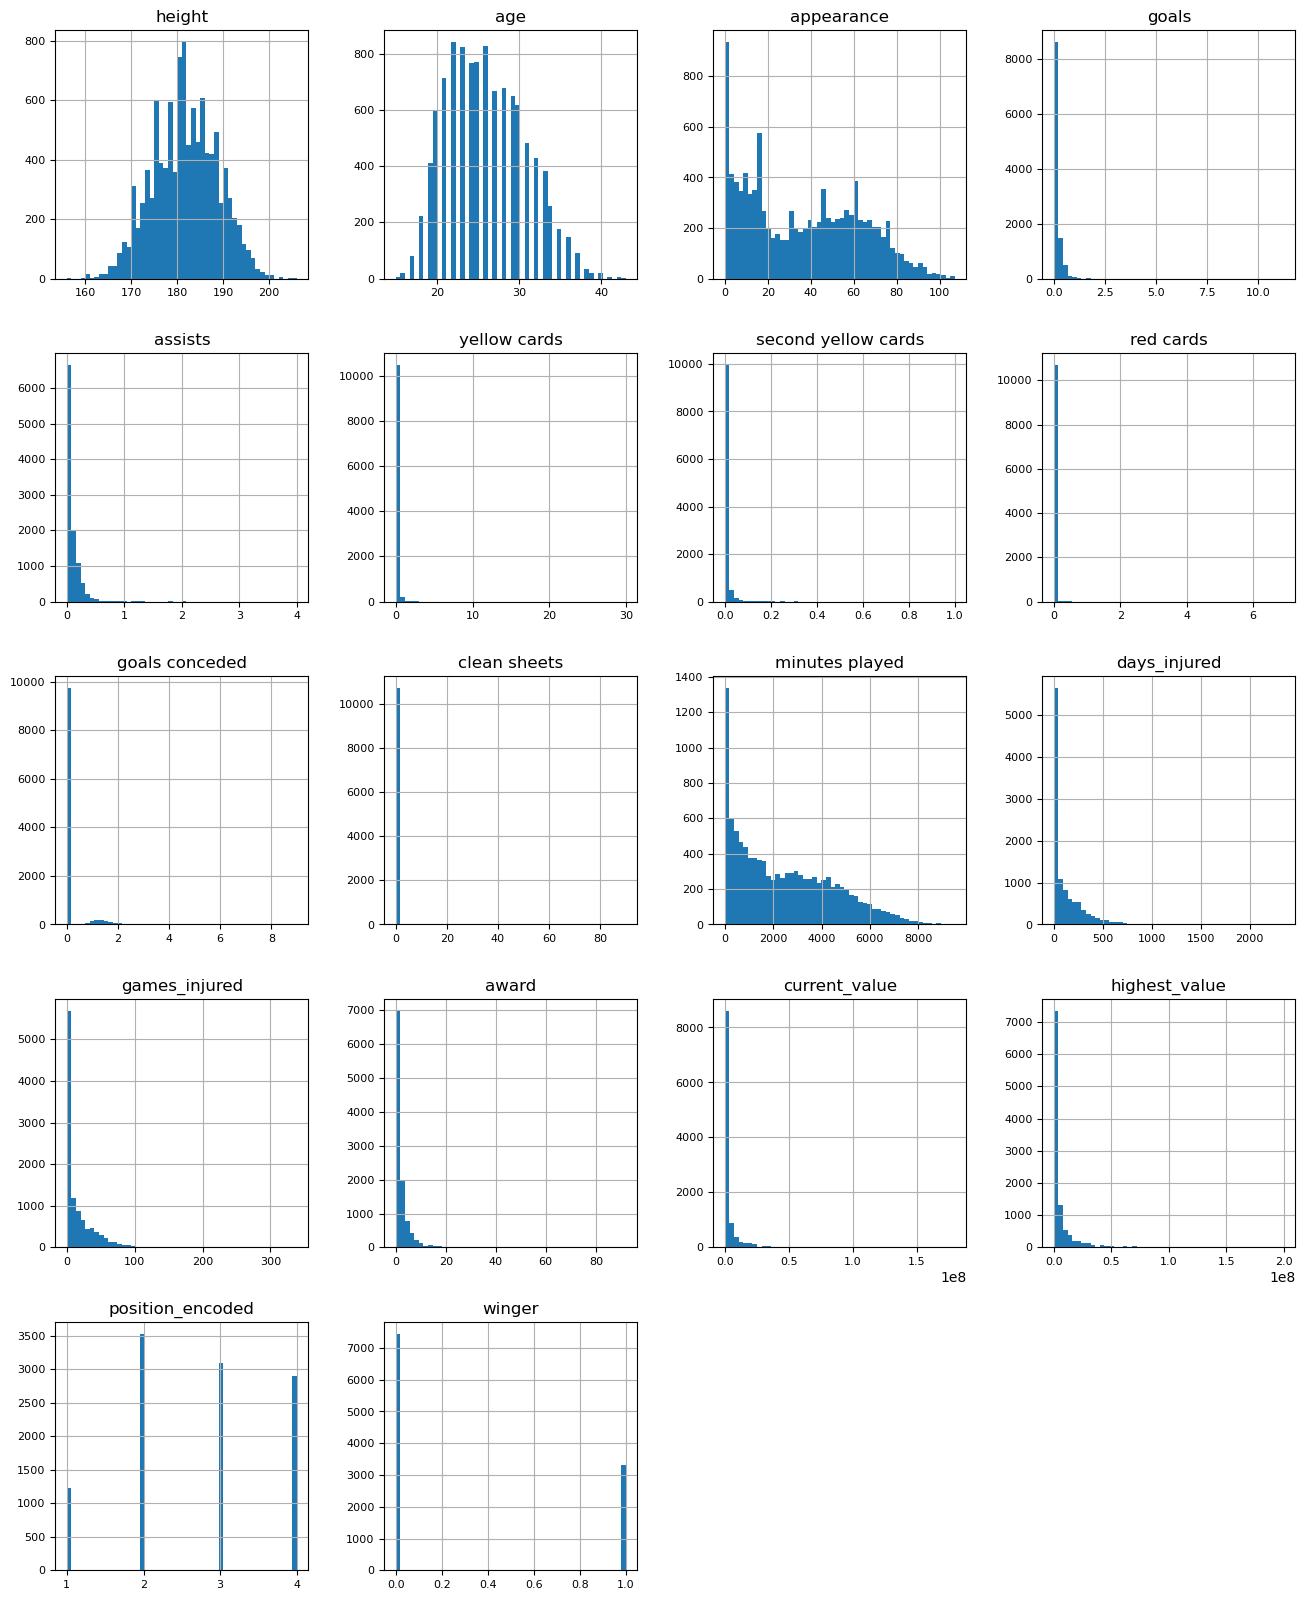

In [29]:
# let's visualize the numerical features
# in the appearance shows a lot of players appeared 0? which might be they didn't show at all? 
df[numerical_features].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [30]:
# i will drop the position encoded because i don't want to encode the positions and confuse the model in the prediction phase
df.drop('position_encoded', axis=1, inplace=True)

In [31]:
df.shape

(10754, 19)

# Feature engineering:

1. One hot encoding: for categorical variables to convert them into numerical format
2. Feature scaling: for numerical variables to ensure they are on the same scale. 

In [32]:
# one hot encoding:
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [33]:
df.shape

(10754, 405)

## The goal of this model is to predict whether a player's market value ('current_value') is above or below a certain threshold.
> The median will be our threshold in this case.

In [36]:
#
X = df.drop(['current_value'], axis=1) # defining X features
y = (df['current_value'] > df['current_value'].median()).astype(int) # target variable

In [37]:
# now let's split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [38]:
# Feature scaling: standardizing the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Building and training the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [53]:
# Predicting on the test data
y_pred = model.predict(X_test_scaled)

In [55]:
# Each row of the model.coef_ matrix means how each feature affects being in the corresponding class versus any other class
coeff_df = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
coeff_df.sort_

,Coefficient
height,0.028998
age,-0.583012
appearance,0.610560
goals,0.050112
assists,0.079236
...,...
position_midfield-AttackingMidfield,0.485173
position_midfield-CentralMidfield,0.547737
position_midfield-DefensiveMidfield,0.480045
position_midfield-LeftMidfield,0.096155


## Evaluation:
> using: 
    1. accuracy
    2. conf_matrix
    3. precision
    4. recall
    5. f1

In [46]:
# 1
accuracy = accuracy_score(y_test, y_pred)
accuracy
# accuracy shows that the model is approximately predicting correctly 84.66% of the test cases

0.8465829846582985

In [47]:
# 2
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

# conf matrix show that the model is correctly predicting 1011 negative cases
# and 810 positive cases 

array([[1011,  119],
       [ 211,  810]], dtype=int64)

In [48]:
# 3
precision = precision_score(y_test, y_pred)
precision
# it's close to accuarcy but this measure shows that the model is fairly good avoiding false positives 

0.8719052744886975

In [49]:
# 4
recall = recall_score(y_test, y_pred)
recall
# here the recall i think shows that we are missing to identify true positives if the case wants it above 85 for example

0.7933398628795298

In [50]:
# 5
f1 = f1_score(y_test, y_pred)
f1
# i think we a good balance for the precision and recall

0.8307692307692307